In [1]:
import tensorflow as tf

D:\setups\conda\envs\tensorflow\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

In [3]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [4]:
train_images.shape

(60000, 28, 28)

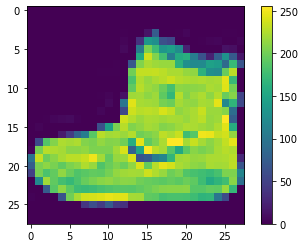

In [5]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()

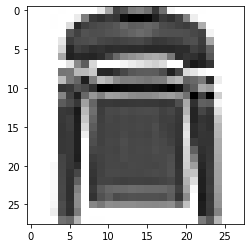

In [6]:
plt.figure()
plt.imshow(train_images[5], cmap= plt.cm.binary)

In [7]:
print(train_images[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 23

In [8]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [9]:
train_images = train_images / 255.0
test_images = test_images / 255.0

<function matplotlib.pyplot.show(close=None, block=None)>

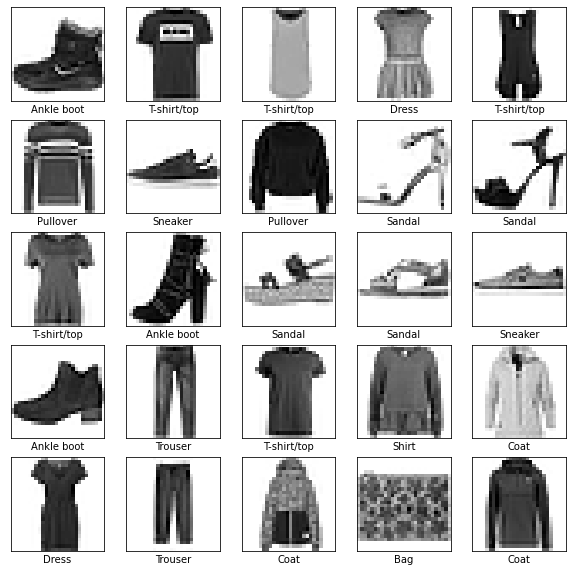

In [10]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(train_images[i], cmap = plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])

plt.show    

In [11]:
model = keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (28,28)),
    tf.keras.layers.Dense(128, activation = 'relu'),
    tf.keras.layers.Dense(10)
])

In [12]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

In [13]:
model.fit(train_images, train_labels, epochs=10)


Epoch 1/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4979 - accuracy: 0.8254
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3742 - accuracy: 0.8649
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3368 - accuracy: 0.8779
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3114 - accuracy: 0.8857
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2921 - accuracy: 0.8921
Epoch 6/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2802 - accuracy: 0.8964
Epoch 7/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2658 - accuracy: 0.9016
Epoch 8/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2564 - accuracy: 0.9050
Epoch 9/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2485 - accuracy: 0.9078
Epoch 10/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.239

In [14]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

313/313 - 0s - loss: 0.3404 - accuracy: 0.8812 - 354ms/epoch - 1ms/step

Test accuracy: 0.8812000155448914


In [15]:
predictions = model.predict(test_images)


In [16]:
test_images.shape

(10000, 28, 28)

In [17]:
predictions.shape

(10000, 10)

In [18]:
predictions[1]

array([  3.5937648 ,  -8.694593  ,  11.6       ,  -7.7283087 ,
         2.9008253 , -21.862768  ,  -0.17138863, -37.32832   ,
       -14.36082   , -28.41646   ], dtype=float32)

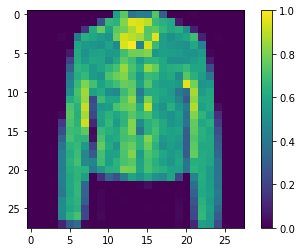

In [25]:
plt.figure()
plt.imshow(test_images[10])
plt.colorbar()
plt.show()

In [20]:
np.argmax(predictions[0])

9

In [21]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'green'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

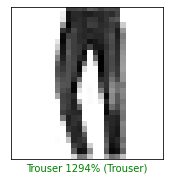

In [22]:
i = 5
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.show()

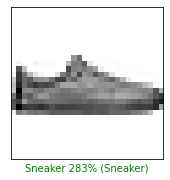

In [23]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.show()